# Google Play Store Data Analysis
## Internship Project
This project analyzes Google Play Store data to uncover app market trends, user sentiment, and pricing strategies.

## 1. Data Loading & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load datasets
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

# Display first few rows
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Data Cleaning & Preprocessing

In [2]:
# Drop unnecessary column
apps_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert Installs to numeric
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

# Convert Price to numeric
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

# Remove rows with missing values
apps_df.dropna(inplace=True)

## 3. Category Exploration

/tmp/ipykernel_76821/554058698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=apps_df['Category'], order=apps_df['Category'].value_counts().index, palette='viridis')


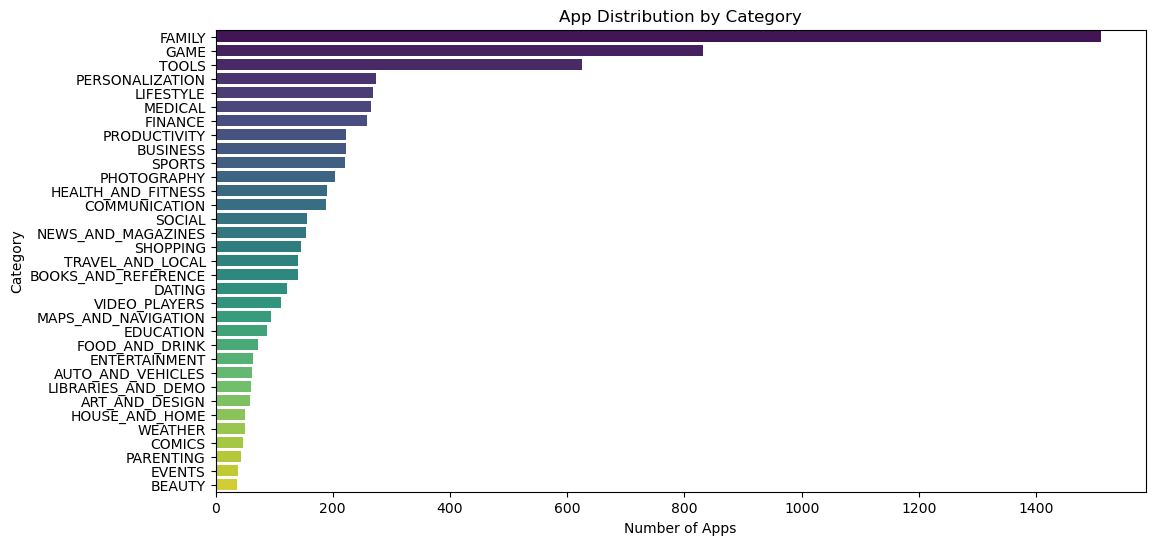

In [3]:
# Count apps by category
plt.figure(figsize=(12,6))
sns.countplot(y=apps_df['Category'], order=apps_df['Category'].value_counts().index, palette='viridis')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('App Distribution by Category')
plt.show()

## 4. Metrics Analysis - Ratings, Size, and Pricing Trends

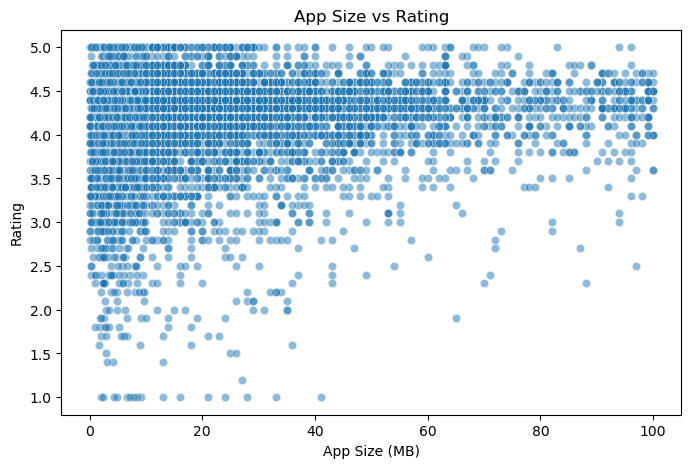

In [4]:
# Scatter plot of App Size vs Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(x=apps_df['Size'], y=apps_df['Rating'], alpha=0.5)
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.title('App Size vs Rating')
plt.show()

## 5. Sentiment Analysis on User Reviews

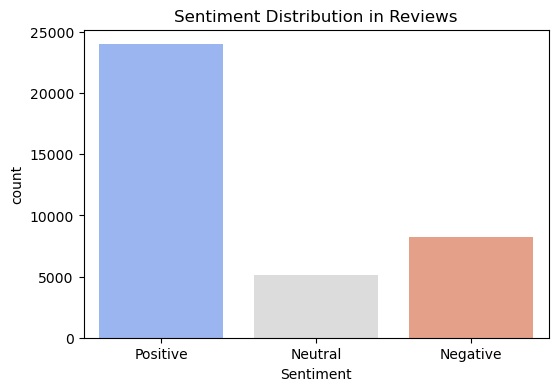

In [12]:
# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=reviews_df, palette='coolwarm', hue='Sentiment', legend=False)
plt.title('Sentiment Distribution in Reviews')
plt.show()

## 6. Interactive Visualization - Word Cloud for Reviews

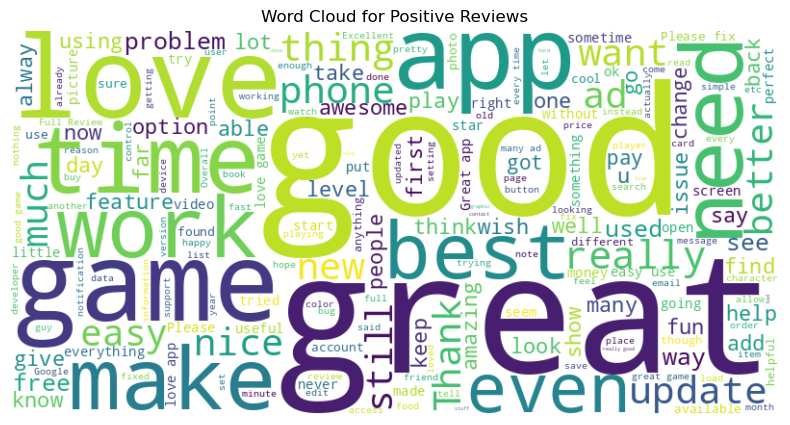

In [6]:
# Generate Word Cloud for positive reviews
positive_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Positive']['Translated_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

## 7. Insights & Business Impact
- **Understand Market Trends**: Identify the most popular app categories.
- **Optimize Pricing Strategies**: Evaluate how pricing affects downloads and ratings.
- **Improve User Engagement**: Leverage sentiment analysis to enhance app quality.
- **Data-Driven Decision Making**: Helps developers create better, more competitive apps.